**MiniProject1
Name: Alon Hillel
ID: 213406945**

Import the libraries and the datasetImport the libraries and the dataset:

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title

df = pd.read_csv('laptop_price - dataset.csv')
print(df)
print(df.info())

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

                           

Plot the price of all the laptops

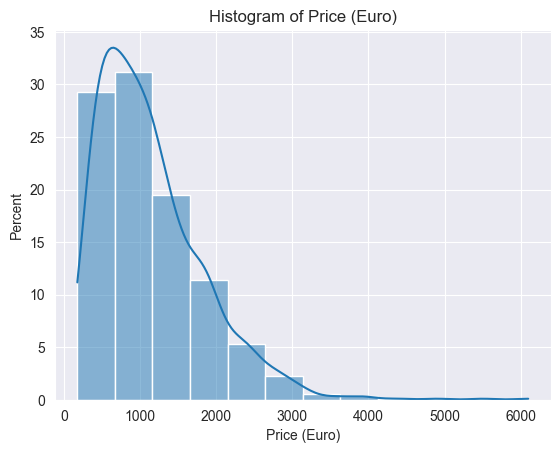

In [84]:
sns.histplot(df['Price (Euro)'], kde=True,stat='percent', binwidth=500,).set(title='Histogram of Price (Euro)');

Which company has on average the most expensive laptop? What is the average laptop price for each company?

,Company,Price (Euro)
17,Vero,217.425000
12,Mediacom,295.000000
3,Chuwi,314.296667
0,Acer,633.464455
5,Fujitsu,729.000000
7,HP,1080.314664
10,Lenovo,1093.862215
2,Asus,1123.829737
18,Xiaomi,1133.462500
4,Dell,1199.225120


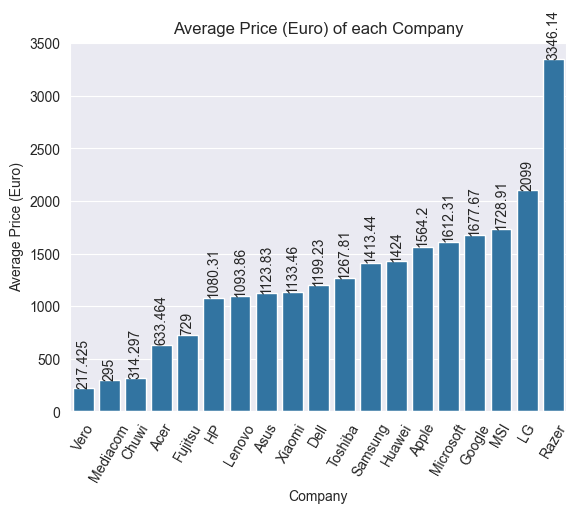

In [86]:
df["Company"].unique()
result = df.groupby('Company')['Price (Euro)'].mean().reset_index().sort_values('Price (Euro)')
ax = sns.barplot(df, x='Company', y='Price (Euro)',estimator="mean",order=result['Company'], errorbar=None)
ax.tick_params(axis='x', rotation=60,)
ax.bar_label(ax.containers[0], fontsize=10,rotation=90)
ax.set_ylabel('Average Price (Euro)')
ax.set_title('Average Price (Euro) of each Company')
result